In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Serg\\Refactored_Py_DS_ML_Bootcamp-master'

I will be developing a simple deep learning model to predict housing prices based on kaggle housing dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
#changing directory to find the dataset 

os.chdir("C:\\Users\\Serg\\Refactored_Py_DS_ML_Bootcamp-master\\TensorFlow_FILES\\TensorFlow_FILES\\DATA")

#listing all files in the directory

os.listdir()

['.ipynb_checkpoints',
 'advanced_housing.csv',
 'african_econ_crises.csv',
 'bank-additional-full.csv',
 'bank-additional-names.txt',
 'bank.csv',
 'boxplot.png',
 'california_housing_sklearn.csv',
 'cancer_classification.csv',
 'diamonds.csv',
 'ECOMPCTNSA.csv',
 'example.csv',
 'Excel_Sample.xlsx',
 'fake_reg.csv',
 'flights.csv',
 'Frozen_Dessert_Production.csv',
 'german_credit_data.csv',
 'heart.csv',
 'iris.csv',
 'kc_house_data.csv',
 'LCDataDictionary.xlsx',
 'lending_club_info.csv',
 'lending_club_loan_two.csv',
 'melb_data.csv',
 'RSCCASN.csv',
 'stroke_data.csv',
 'stroke_features.png',
 'Universities.csv']

In [4]:
df = pd.read_csv("kc_house_data.csv")

In [5]:
#checking for missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 1. EDA 

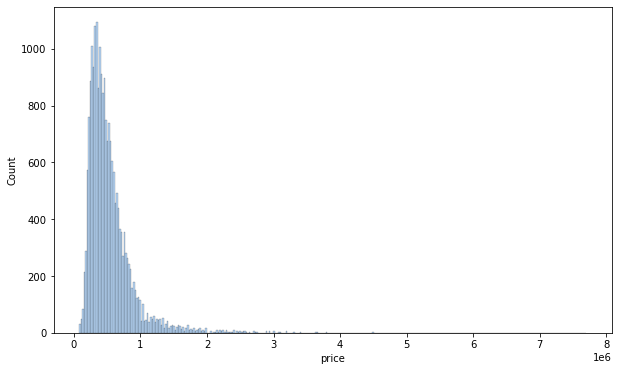

In [6]:
sns.set_palette("pastel")
plt.figure(figsize = (10,6))
sns.histplot(df["price"])

plt.show()

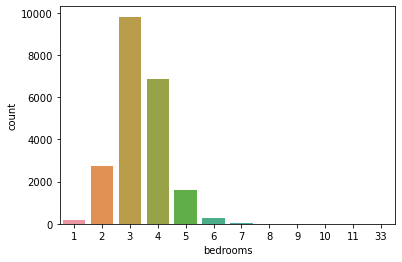

In [7]:
#checking the distribution of number of bedrooms
sns.countplot(x = df["bedrooms"])
plt.show()

<AxesSubplot:>

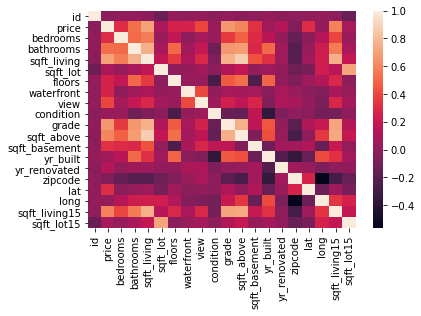

In [8]:
#correlation check

sns.heatmap(df.corr())

In [9]:
#we are interest to see what features the price is correlated with 
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

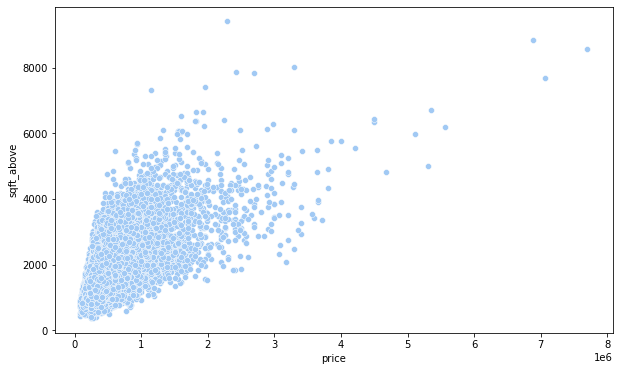

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "price",y ="sqft_above",data = df)
plt.show()

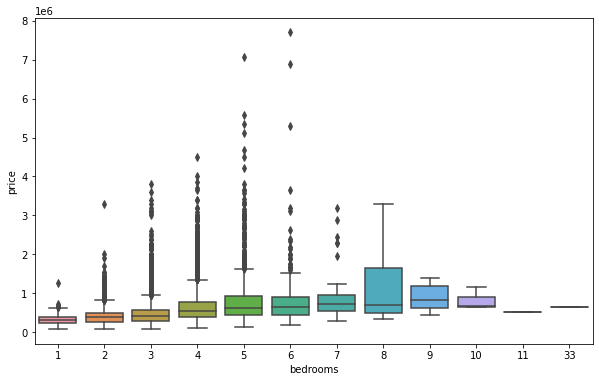

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "bedrooms",y = "price",data = df)
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

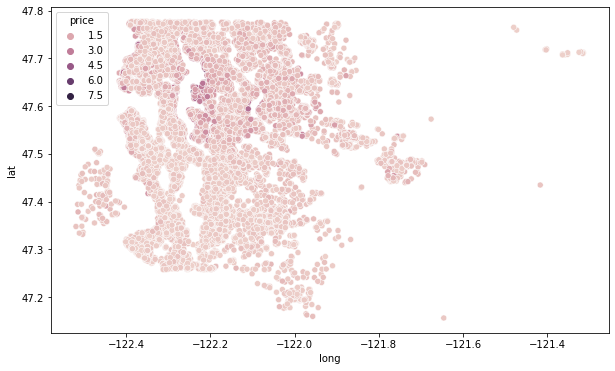

In [12]:
#using simple scatter plot to plot out the area of the King County

plt.figure(figsize = (10,6))
sns.scatterplot(x = "long",y="lat",data = df, hue = "price",)

The does not show a clear separation between the house prices. Simple data sort would solve this. 

In [13]:
# deviding the dataset between top 1% of prices and the rest
not_top_1 = df.sort_values("price",ascending = False).iloc[round(len(df)*0.01):]

<AxesSubplot:xlabel='long', ylabel='lat'>

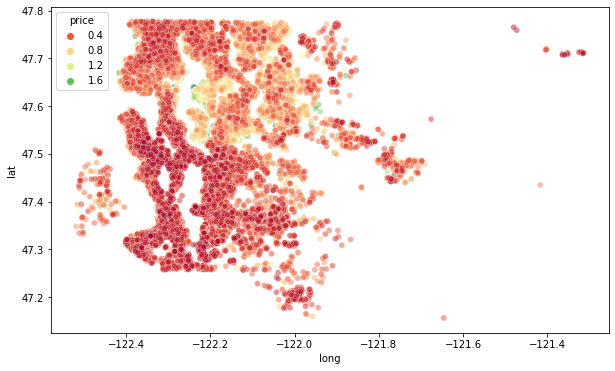

In [14]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "long",y="lat",data = not_top_1,
                hue = "price", alpha = 0.5, palette ="RdYlGn" )

From the scatter plot it seems as if waterfront houses tend to have higher value. It can be checked with a boxplot and "waterfront" feature. 

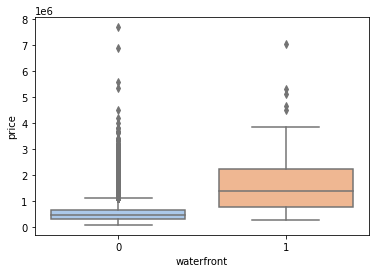

In [15]:
sns.boxplot(x = "waterfront", y = "price", data = df)
plt.show()

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


ID column seems to be an arbitrary number which is not necessary. Can drop it. 

In [17]:
df = df.drop("id", axis = 1)

In [18]:
#checking the formatting of dates 
type(df["date"][0])

str

In [19]:
df["date"] = pd.to_datetime(df["date"])

In [20]:
#checking the formatting of dates 
type(df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
#extracting year
df["year"] = df["date"].apply(lambda date: date.year)
#extracting month
df["month"] = df["date"].apply(lambda date: date.month)

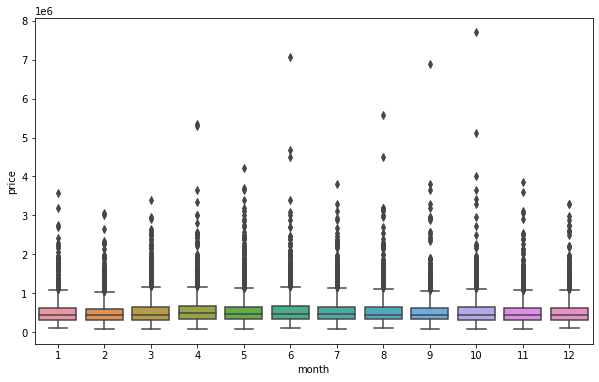

In [22]:
#checking whether there is a month-price relationship
plt.figure(figsize = (10,6))

sns.boxplot(x="month",y="price",data = df)

plt.show()

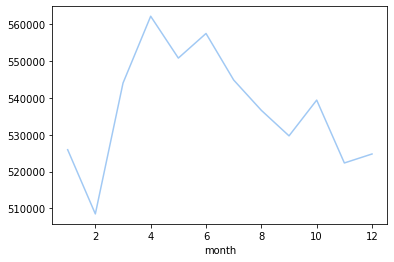

In [23]:
df.groupby("month").mean()["price"].plot()
plt.show()

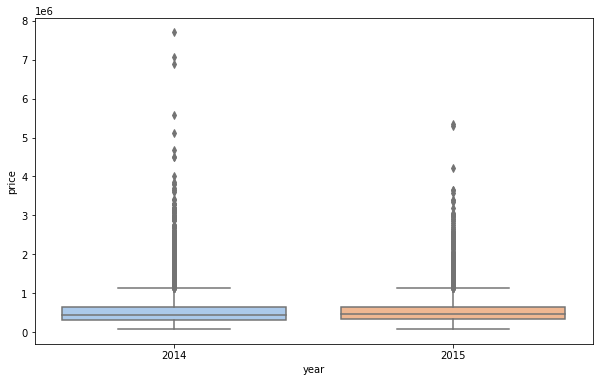

In [24]:
#checking whether there is a year-price relationship
plt.figure(figsize = (10,6))

sns.boxplot(x="year",y="price",data = df)

plt.show()

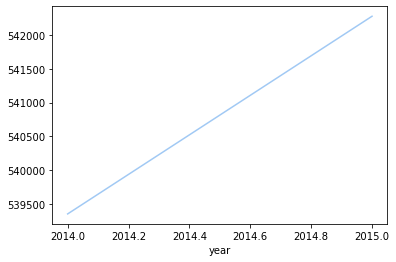

In [25]:
df.groupby("year").mean()["price"].plot()
plt.show()

Likely to be a constant price increase following inflation

In [26]:
#dropping used date column

df = df.drop("date",axis=1)

In [27]:
df["zipcode"].value_counts()
#too many unique values to create dummies so will have to drop the column

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [28]:
df = df.drop("zipcode",axis = 1)

In [29]:
df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

0 means that it has not been renovated. Do not have to change the data as the more recent rennovations are likely to lead to higher prices

In [30]:
df["sqft_basement"].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

0 means no basement. Can keep this continuous. 

# 2. Data preprocessing

In [31]:
#separating target variable and features and converting them to numpy arrays for congruence
X = df.drop("price",axis = 1).values
y = df["price"].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
X_train.shape

(15117, 19)

In [47]:
model = Sequential()

#creating a four layer 19 neuron model with Rectifier Linear Units activation function
model.add(Dense(19,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(19,activation = "relu"))
#one layer one neuron model for output
model.add(Dense(1))

model.compile(optimizer = "adam",loss = "mse")

In [48]:
#fitting the model
model.fit(x=X_train,y = y_train,
          validation_data=(X_test,y_test),
         batch_size = 128,
         epochs = 400,
         verbose = 0)

In [49]:
losses = pd.DataFrame(model.history.history)

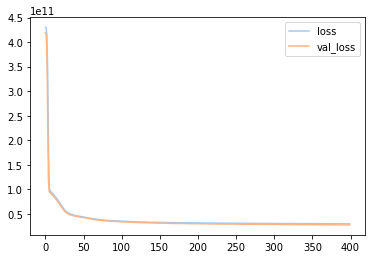

In [52]:
losses.plot()
plt.show()

#there is no overfitting 

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score

In [54]:
predictions = model.predict(X_test)

In [56]:
mean_squared_error(y_test,predictions)**0.5

166235.2796454659

In [57]:
mean_absolute_error(y_test,predictions)

102502.89540955343

In [58]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [59]:
5.402966e+05

540296.6

Our mean squared error shows im off by 20% from the mean price

In [61]:
explained_variance_score(y_test,predictions)

0.7916831313020869

We are explaining 79% of the price variance

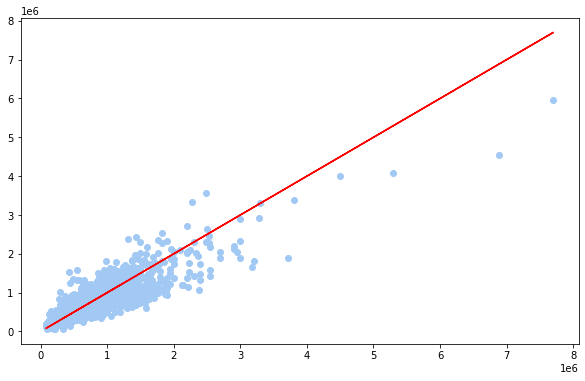

In [63]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,"r")

Seems like the model is getting punished by large price outliers, but perfroms well in the range between 0-2million